In [1]:
import pandas as pd

# Load the trader dataset
trader_df = pd.read_csv("D:/studies/fear_greed_index - fear_greed_index.csv")  # update the path

# Load the market sentiment dataset
sentiment_df = pd.read_csv("D:/studies/historical_data - historical_data.csv")  # update the path


In [11]:
trader_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
sentiment_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [17]:
# Convert 'Timestamp IST' or 'Timestamp' to date (choose one based on your data)
sentiment_df['Timestamp IST'] = pd.to_datetime(sentiment_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_df['trade_date'] = sentiment_df['Timestamp IST'].dt.date

# Make sure trader_df['date'] is date only (not datetime), already parsed above
trader_df['date'] = pd.to_datetime(trader_df['date']).dt.date


In [19]:
# Merge on date
merged_df = pd.merge(sentiment_df, trader_df, left_on='trade_date', right_on='date', how='inner')

# Quick look
print(merged_df[['trade_date', 'classification', 'Closed PnL', 'Side', 'Account']].head())


   trade_date classification  Closed PnL Side  \
0  2024-12-02  Extreme Greed         0.0  BUY   
1  2024-12-02  Extreme Greed         0.0  BUY   
2  2024-12-02  Extreme Greed         0.0  BUY   
3  2024-12-02  Extreme Greed         0.0  BUY   
4  2024-12-02  Extreme Greed         0.0  BUY   

                                      Account  
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  


In [21]:
# Group by sentiment and calculate average Closed PnL
performance_by_classification = merged_df.groupby('classification')['Closed PnL'].mean()
print(performance_by_classification)


classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


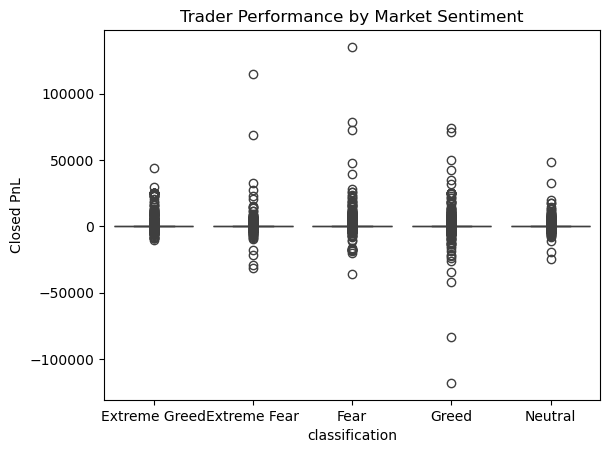

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Trader Performance by Market Sentiment')
plt.show()


In [25]:
# Average fee by market sentiment
fee_by_sentiment = merged_df.groupby('classification')['Fee'].mean()
print(fee_by_sentiment)

# Trades side distribution
trade_side_dist = merged_df.groupby(['classification', 'Side']).size().unstack(fill_value=0)
print(trade_side_dist)


classification
Extreme Fear     1.116291
Extreme Greed    0.675902
Fear             1.495172
Greed            1.254372
Neutral          1.044798
Name: Fee, dtype: float64
Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717


In [27]:
performance_volatility = merged_df.groupby('classification')['Closed PnL'].std()
print(performance_volatility)


classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


In [29]:
account_sentiment_pnl = merged_df.groupby(['Account', 'classification'])['Closed PnL'].mean().unstack()
print(account_sentiment_pnl)


classification                              Extreme Fear  Extreme Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012   1247.692214     -42.626810   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    -24.912665      43.222903   
0x271b280974205ca63b716753467d5a371de622ab     20.962214     358.632043   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    -44.714307      14.437904   
0x2c229d22b100a7beb69122eed721cee9b24011dd    101.921855      61.498681   
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891   -216.607703     192.498023   
0x39cef799f8b69da1995852eea189df24eb5cae3c    -45.671160     125.272912   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6      5.818598     178.981335   
0x420ab45e0bd8863569a5efbb9c05d91f40624641    155.099710      37.218691   
0x430f09841d65beb3f27765503d0f850b8bce7713      0.000000    8285.663252   
0x47add9a56df66b524d5e2c1993a43cde53b6ed85    -37.154584      21.357444   
0x4acb90e786d897ecffb614d

In [37]:
merged_df['hour'] = pd.to_datetime(merged_df['Timestamp IST']).dt.hour
hourly_pattern = merged_df.groupby(['classification', 'hour'])['Closed PnL'].mean().unstack()
print(hourly_pattern)


hour                    0           1           2          3           4   \
classification                                                              
Extreme Fear    -44.893300  213.605383   40.727960   2.348132   44.869514   
Extreme Greed    21.762856   45.353520   29.624855  82.805247  125.732361   
Fear             52.761709   88.826986  105.273416  62.977295   12.430125   
Greed            17.191392   12.005437   18.603290   5.551280   19.383163   
Neutral         134.571682   -6.661192  -18.546371  68.930573   88.725600   

hour                   5          6           7           8          9   ...  \
classification                                                           ...   
Extreme Fear     1.094749  19.558491   66.435572  231.370299  83.017208  ...   
Extreme Greed   51.746066  76.552348   17.537817   65.015915  96.167294  ...   
Fear            42.032502  32.297894  142.580359   61.771588  28.565835  ...   
Greed           35.290038  21.126915   46.768159   38.261023

In [39]:
correlation = merged_df[['value', 'Closed PnL']].corr()
print(correlation)


               value  Closed PnL
value       1.000000    0.008121
Closed PnL  0.008121    1.000000


In [41]:
merged_df['win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification')['win'].mean()
print(win_rate)


classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: win, dtype: float64
